In [1]:
import torch
import numpy as np

# Tensor Indexing, Slicing, Joining and Mutating Ops

### Table of Contents

1. [torch.adjoint](#torch.adjoint)
2. [torch.argwhere](#torch.argwhere)
3. [torch.cat](#torch.cat)
4. [torch.chunk](#torch.chunk)
5. [torch.dsplit](#torch.dsplit)
6. [torch.column_stack](#torch.column_stack)
7. [torch.dstack](#torch.dstack)
8. [torch.gather](#torch.gather)
9. [torch.hsplit](#torch.hsplit)
10. [torch.hstack](#torch.hstack)
11. [torch.index_select](#torch.index_select)
12. [torch.masked_select](#torch.masked_select)
13. [torch.movedim](#torch.movedim)
14. [torch.narrow](#torch.narrow)
15. [torch.nonzero](#torch.nonzero)
16. [torch.permute](#torch.permute)
17. [torch.reshape](#torch.reshape)
18. [torch.vstack](#torch.vstack)
19. [torch.where](#torch.where)
20. [torch.select](#torch.select)
21. [torch.diagonal_scatter](#torch.diagonal_scatter)
22. [torch.select_scatter](#torch.select_scatter)
23. [torch.slice_scatter](#torch.slice_scatter)
24. [torch.split](#torch.split)
25. [torch.squeeze](#torch.squeeze)
26. [torch.stack](#torch.stack)
27. [torch.T](#torch.T)
28. [torch.take](#torch.take)
29. [torch.take_along_dim](#torch.take_along_dim)
30. [torch.tensor_split](#torch.tensor_split)
31. [torch.tile](#torch.tile)
32. [torch.transpose](#torch.transpose)

<a id="torch.adjoint"></a>
### 1. torch.adjoint

`torch.adjoint(Tesnor) -> Tensor`

Returns a view of the tensor conjugated and with the last two dimensions transposed. 

`x.adjoint()` is equivalent to `x.transpose(-2, -1).conj()` for complex tensors and to `x.transpose(-2, -1)` for real tensors. 

In [2]:
x = torch.arange(4, dtype=torch.float)
A = torch.complex(x, x).reshape(2,2)
A

tensor([[0.+0.j, 1.+1.j],
        [2.+2.j, 3.+3.j]])

In [3]:
A.adjoint()

tensor([[0.-0.j, 2.-2.j],
        [1.-1.j, 3.-3.j]])

<a id="torch.argwhere"></a>
### 2. torch.argwhere

`torch.argwhere(input) -> Tensor`

Returns a tensor containing the indices of all non-zero element in `input`. If `input` has $n$ dimensions, then the resulting indices tensor `out` is of size ($z \times n$), where $z$ is the total number of non-zero elements in the `input` tensor. 

In [4]:
t= torch.tensor([1, 0, 1])
torch.argwhere(t)

tensor([[0],
        [2]])

In [5]:
t = torch.tensor([[1, 0, 1], [0, 1, 1]])
torch.argwhere(t)

tensor([[0, 0],
        [0, 2],
        [1, 1],
        [1, 2]])

<a id="torch.cat"></a>
### **3. torch.cat** -> IMPORTANT

`torch.cat(tensors, dim=0, *, out=None) -> Tensor`

Concatenates the given sequence of `seq` tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.

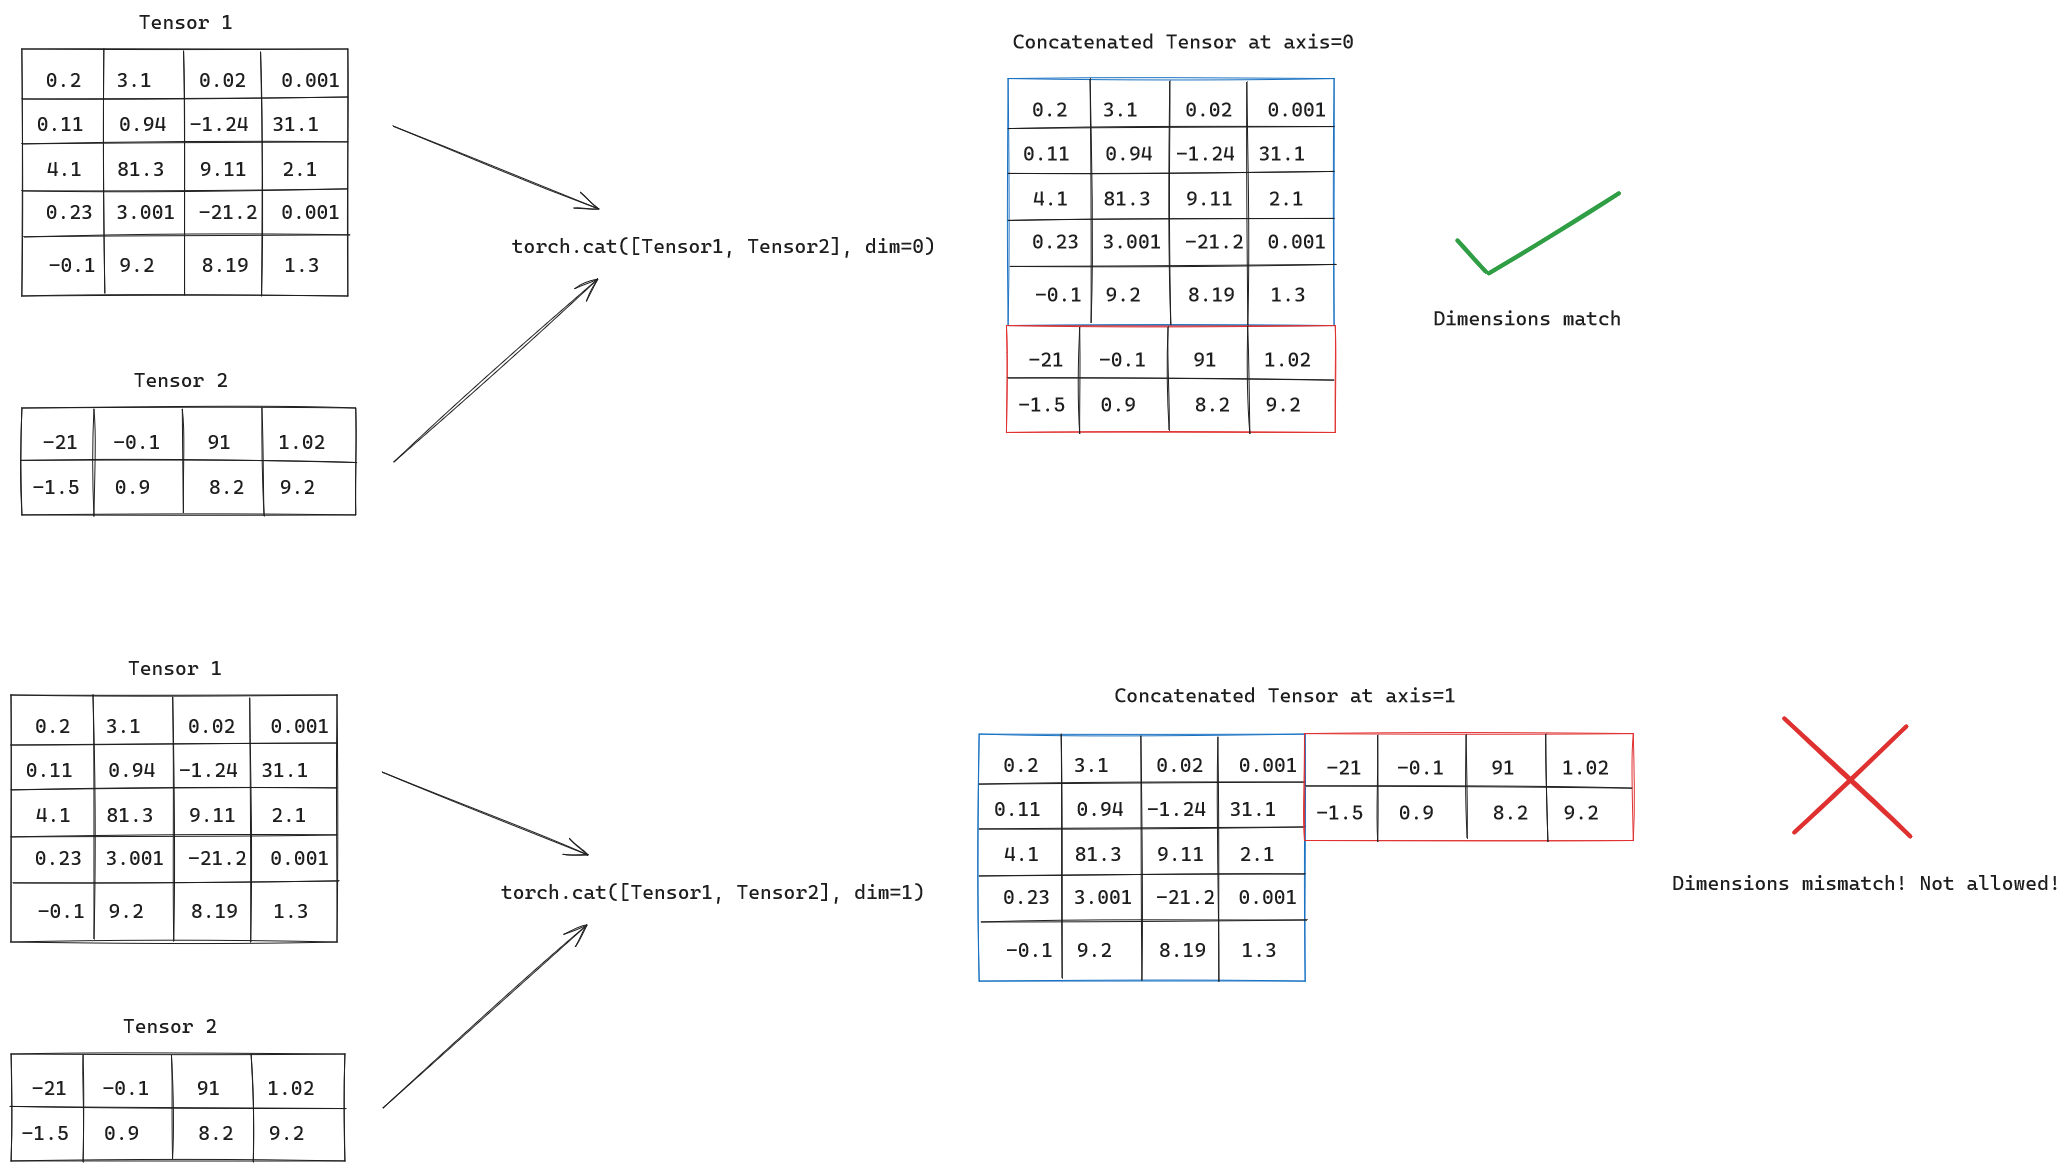

``torch.cat`` can be seen as an inverse operation for ``torch.split()`` and ``torch.chunk()``.

In [6]:
x = torch.randn(5,4)
y = torch.rand(2,4)
x, y

(tensor([[-0.4370, -0.7456, -1.2574, -1.1353],
         [-1.1123,  0.1991, -0.7414,  0.4989],
         [ 0.5964, -0.8709,  0.7796,  0.5555],
         [ 1.4308, -0.0560,  1.1936,  0.6006],
         [ 0.3608, -0.9131, -0.4967, -1.4486]]),
 tensor([[0.3357, 0.3670, 0.8157, 0.1027],
         [0.2722, 0.2767, 0.6388, 0.5144]]))

In [7]:
torch.cat([x,y], 0)

tensor([[-0.4370, -0.7456, -1.2574, -1.1353],
        [-1.1123,  0.1991, -0.7414,  0.4989],
        [ 0.5964, -0.8709,  0.7796,  0.5555],
        [ 1.4308, -0.0560,  1.1936,  0.6006],
        [ 0.3608, -0.9131, -0.4967, -1.4486],
        [ 0.3357,  0.3670,  0.8157,  0.1027],
        [ 0.2722,  0.2767,  0.6388,  0.5144]])

<a id="torch.conj"></a>
### 4. torch.conj

Returns a view of `input` with a flipped conjuate bit. If `input` has a non-complex dtype, this function just returns `input` 

In [8]:
x = torch.tensor([-1 + 1j, -2 + 2j, 3 - 3j])
x.is_conj()

False

In [9]:
y = torch.conj(x)
y.is_conj()

True

<a id="torch.chunk"></a>
### 4. torch.chunk

`torch.chunk(inputs, chunks, dim=0) -> List of Tensors`

Attempts to split tensor into the specified number of chunks. Each chunk is a view of the input tensor.

If the tensor size along the given dimension `dim` is divisible by `chunks`, all returned chunks will be the same size. If the tensor size along the given dimension `dim` is not divisible by `chunks`, all returned chunks wil be the same sizem except the last one.

In [10]:
torch.arange(11).chunk(5)

(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([ 9, 10]))

In [11]:
torch.arange(12).chunk(6)

(tensor([0, 1]),
 tensor([2, 3]),
 tensor([4, 5]),
 tensor([6, 7]),
 tensor([8, 9]),
 tensor([10, 11]))

In [12]:
torch.rand(6,3).chunk(3)

(tensor([[0.0089, 0.7115, 0.2944],
         [0.4230, 0.1977, 0.2899]]),
 tensor([[0.5133, 0.3504, 0.6861],
         [0.3144, 0.5095, 0.4781]]),
 tensor([[0.2495, 0.5318, 0.0920],
         [0.4141, 0.4830, 0.3007]]))

<a id="torch.dsplit"></a>
### 5. torch.dsplit

`torch.dsplit(input, indices_or_sections) -> List of Tensors`

Splits `input`, a tensor with three or more dimensions, into multiple tensor depthwise according to `indices_or_sections`. Each split is a view of `input`

This is *equivalent* to calling `torch.tensor_split(input, indices_or_sections, dim=2)` (the split dimension is 2), except that if `indices_or_sections` is an integer it must evenly divide the split dimension or a runtime error will be thrown.

In [13]:
t = torch.arange(16.0).reshape(2, 2, 4)
t

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]],

        [[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]])

In [20]:
torch.dsplit(t, 2)

(tensor([[[ 0.,  1.],
          [ 4.,  5.]],
 
         [[ 8.,  9.],
          [12., 13.]]]),
 tensor([[[ 2.,  3.],
          [ 6.,  7.]],
 
         [[10., 11.],
          [14., 15.]]]))

In [18]:
torch.dsplit(t, [3, 6])

(tensor([[[ 0.,  1.,  2.],
          [ 4.,  5.,  6.]],
 
         [[ 8.,  9., 10.],
          [12., 13., 14.]]]),
 tensor([[[ 3.],
          [ 7.]],
 
         [[11.],
          [15.]]]),
 tensor([], size=(2, 2, 0)))

<a id="torch.column_stack"></a>
### 6. torch.column_stack

`torch.column_stack(tensors, *, out=None) -> Tensors`

Creates a new tensor by horizontally stacking the tensors in tensors.

Equivalent to `torch.stack(tensors)`, except each zero or one dimensional tensor `t` in `tensors` is first reshaped into a `(t.numel(), 1)` column before being stacked horizontally. 



In [21]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.column_stack([a,b])

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [22]:
a = torch.arange(5)
b = torch.arange(10).reshape(5, 2)
torch.column_stack([a, b, b])

tensor([[0, 0, 1, 0, 1],
        [1, 2, 3, 2, 3],
        [2, 4, 5, 4, 5],
        [3, 6, 7, 6, 7],
        [4, 8, 9, 8, 9]])

<a id="torch.dstack"></a>
### 7. torch.dstack

`torch.dstack(tensors, *, out=None) -> tensor`

Stack tensor in sequence depthwise (along third axis)

This is equivalent to concatenation along the third axis after 1-D and 2-D tensors have been reshaped by `torch.atleast_3d()`

In [25]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
torch.dstack([a,b])

tensor([[[1, 4],
         [2, 5],
         [3, 6]]])

In [26]:
a = torch.tensor([[1], [2], [3]])
b = torch.tensor([[4], [5], [6]])
torch.dstack([a, b])

tensor([[[1, 4]],

        [[2, 5]],

        [[3, 6]]])

<a id="torch.gather"></a>
### 8. torch.gather

`torch.gather(input, dim, index, *, sparse_grad=False, out=None) -> Tensor`

Gathers values along an axis specified by `dim`

`input` and `index` must have the same number of dimensions. It is also required that `index.size(d) <= input.size(d)` for all dimensions `d != dim`. `out` will have the same shape as `index`.

**Example**

Input Tensor:

`[[1, 2],
 [3, 4]]`
 
Index Tensor (specifying which elements to pick from each row):

`[[0, 0],
[1, 0]]`

The first tensor`[0, 0]` tells use to pick the 0'th element twice from the first tensor `[1, 2]` of input tensor, resulting in `[1, 1]`

Result of `torch.gather(input, dim=1, index)`:

`[[1, 1],
[4, 3]]`

In [28]:
t = torch.tensor([[1, 2], [3, 4]])
torch.gather(t, 1, torch.tensor([[0, 0], [1, 0]]))

tensor([[1, 1],
        [4, 3]])

<a id="torch.hsplit"></a>
### 9. torch.hsplit

`torch.hsplit(input, indices_or_sections) -> List of Tensors`

Splits `input`, a tensor with one or more dimensions, into multiple tensors horizontally according to `indices_or_sections`.


In [32]:
t = torch.arange(16.0).reshape(4, 4)
t

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [30]:
torch.hsplit(t, 2)

(tensor([[ 0.,  1.],
         [ 4.,  5.],
         [ 8.,  9.],
         [12., 13.]]),
 tensor([[ 2.,  3.],
         [ 6.,  7.],
         [10., 11.],
         [14., 15.]]))

In [37]:
torch.hsplit(t, [3, 6])

(tensor([[ 0.,  1.,  2.],
         [ 4.,  5.,  6.],
         [ 8.,  9., 10.],
         [12., 13., 14.]]),
 tensor([[ 3.],
         [ 7.],
         [11.],
         [15.]]),
 tensor([], size=(4, 0)))

<a id="torch.hstack"></a>
### 10. torch.hstack

`torch.hstack(tensors, *, out=None) -> Tensor`

Stack tensors in sequence horizontally (column wise).

This is equivalent to concatenation along the first axis for 1-D tensors, and along the second axis for all other tensors.

In [38]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.hstack([a,b])

tensor([1, 2, 3, 4, 5, 6])

In [40]:
a = torch.tensor([[1], [2], [3]])
b = torch.tensor([[4], [5], [6]])
torch.hstack([a,b])

tensor([[1, 4],
        [2, 5],
        [3, 6]])

<a id="torch.index_select"></a>
### 11. torch.index_select

`torch.index_select(input, dim, index, *, out=None) -> Tensor`

Returns a new tensor which indexes the `input` tensor along dimensions `dim` using the enteries in `index` which is a LongTensor.

The returned tensor has the same number of dimensions as the original tensor (`input`). The `dim`'th dimension has the same size as the length of `index`; other dimensions have the same size as in the original tensor. 

the returned tensor does **not** use the same storage as the original tensor.

In [42]:
x = torch.randn(3, 4)
x

tensor([[-0.5660, -1.9879,  0.2847, -0.6155],
        [ 0.3964, -0.6920,  0.3326, -0.4066],
        [ 0.5589, -0.2524,  0.3985,  0.3294]])

In [43]:
indices = torch.tensor([0, 2])
torch.index_select(x, 0, indices)

tensor([[-0.5660, -1.9879,  0.2847, -0.6155],
        [ 0.5589, -0.2524,  0.3985,  0.3294]])

<a id="torch.masked_select"></a>
### 12. **torch.masked_select** IMPORTANT

Returns a new 1-D tensor which indexes the `input` tensor according to the boolean `mask` which is a BoolTensor. The shapes of the `mask` tensor and the `input` tensor don't need to match, but they must be broadcastable.

Note: the returned tensor does **not** use the same storage as the original tensor.

In [44]:
x = torch.randn(3, 4)
x

tensor([[-1.0364, -1.3260,  0.6419, -0.2189],
        [-0.7744, -2.0906, -0.3907,  0.0359],
        [ 1.6621,  0.0106, -0.9805, -0.1930]])

In [45]:
mask = x.ge(0.5) # returns a boolean tensor with TRUE where value is greater equal than 0.5
mask

tensor([[False, False,  True, False],
        [False, False, False, False],
        [ True, False, False, False]])

In [46]:
torch.masked_select(x, mask)

tensor([0.6419, 1.6621])

<a id="torch.movedim"></a>
### 13. torch.movedim

`torch.movedim(input, source, destination) -> Tensor`

Moves the dimension(s) of `input` at the position(s) in `source` to the position(s) in `destination`

Other dimensions of `input` that are not explicitly moved remain in their original order and appear at the positions not specified in `destination`.

In [47]:
t = torch.randn(3,2,1)
t

tensor([[[ 0.6820],
         [-0.1481]],

        [[ 0.5035],
         [ 1.0246]],

        [[-0.1851],
         [-0.0350]]])

In [48]:
torch.movedim(t, 1, 0).shape

torch.Size([2, 3, 1])

In [49]:
torch.movedim(t, 1, 0)

tensor([[[ 0.6820],
         [ 0.5035],
         [-0.1851]],

        [[-0.1481],
         [ 1.0246],
         [-0.0350]]])

In [53]:
# Move previous dim 1 to new dimension 2, Move previous dim 0 to new dimension 1 
torch.movedim(t, (1,2), (0,1)).shape 

torch.Size([2, 1, 3])

In [54]:
torch.movedim(t, (1,2), (0,1))

tensor([[[ 0.6820,  0.5035, -0.1851]],

        [[-0.1481,  1.0246, -0.0350]]])

Another alias for torch.movedim is `torch.moveaxis(input, source, destination)`

<a id="torch.narrow"></a>
### 14. torch.narrow

`torch.narrow(input, dim, start, length) -> Tensor`

Returns a new tensor that narrowed version of `input` tensor. The dimension `dim` is input from `start` to `start + length`. The returned tensor and `input` tensor share the same underlying storage.


In [57]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
torch.narrow(x, 0, 0, 2)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


tensor([[1, 2, 3],
        [4, 5, 6]])

In [56]:
torch.narrow(x, 1, 1, 2)

tensor([[2, 3],
        [5, 6],
        [8, 9]])

`torch.narrow_copy(input, dim, start, length) -> Tensor` is same as torch.narrow except that this returns a copy rather than shared storage. It's primarly for sparse tensor, which do not have a shared-storage narrow defined.

In [60]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
torch.narrow_copy(x, 0, 0, 2)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


tensor([[1, 2, 3],
        [4, 5, 6]])

In [62]:
s = torch.arange(16).reshape(2, 2, 2, 2).to_sparse(2)
torch.narrow_copy(s, 0, 0, 1)

tensor(indices=tensor([[0, 0],
                       [0, 1]]),
       values=tensor([[[0, 1],
                       [2, 3]],

                      [[4, 5],
                       [6, 7]]]),
       size=(1, 2, 2, 2), nnz=2, layout=torch.sparse_coo)

<a id="torch.nonzero"></a>
### 15. torch.nonzero

`torch.nonzero(input, *, out=None, as_tuple=False) -> LongTensor or tuple of LongTensor`

**When `as_tuple` is `False` (default):**

Returns a tensor containing the indices of all non-zero elements of `input`. Each row in the results contain the indices of a non-zero element in `input`

If `input` has $n$ dimensions, then the resulting indices tensor `out` is of size $(z \times n)$, where $z$ is the total number of non-zero elements in the `input` tensor.

In [63]:
torch.nonzero(torch.tensor([1, 1, 1, 0, 1]))

tensor([[0],
        [1],
        [2],
        [4]])

In [64]:
torch.nonzero(torch.tensor([[0.6, 0.0, 0.0, 0.0],
                            [0.0, 0.4, 0.0, 0.0],
                            [0.0, 0.0, 1.2, 0.0],
                            [0.0, 0.0, 0.0,-0.4]]))

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3]])

**When `as_tuple` is `True`:**

Returns a tuple of 1-D tensors, one for each dimension in `input`, each containing the indices (in that dimension) of all non-zero elements in the `input` tensor.

In [66]:
torch.nonzero(torch.tensor([1, 1, 1, 0, 1]), as_tuple=True)

(tensor([0, 1, 2, 4]),)

In [69]:
torch.nonzero(torch.tensor([[0.6, 0.0, 0.0, 0.0],
                            [0.0, 0.4, 0.0, 0.0],
                            [0.0, 0.0, 1.2, 0.0],
                            [0.0, 0.0, 0.0,-0.4]]), as_tuple=True)

(tensor([0, 1, 2, 3]), tensor([0, 1, 2, 3]))

As a special case, when input has zero dimensions and a nonzero scalar value, it is treated as a one-dimensional tensor with one element.

In [70]:
torch.nonzero(torch.tensor(5), as_tuple=True)

(tensor([0]),)

<a id="torch.permute"></a>
### 16. **torch.permute** IMPORTANT

`torch.permute(input, dims) -> Tensor`

Returns a view of the original tensor `input` with its dimesnions permuted.


In [72]:
t = torch.randn(3,2,1)
t

tensor([[[-1.3114],
         [-0.9629]],

        [[ 0.3747],
         [ 2.7665]],

        [[ 0.4227],
         [ 0.2820]]])

In [76]:
torch.movedim(t, 1, 0).shape, torch.permute(t, [1, 0, 2]).shape

(torch.Size([2, 3, 1]), torch.Size([2, 3, 1]))

In [77]:
x = torch.randn(2, 3, 5)
x.size()

torch.Size([2, 3, 5])

In [78]:
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

<a id="torch.reshape"></a>
### 17. **torch.reshape** IMPORTANT

`torch.reshape(input, shape) -> Tensor`

Returns a tensor with same data and number of elements as `input`, but with the specified shape. 

When possible, the returned tensor will be a view of `input`. Otherwise, it will be a copy.

A single simendion may be -1, in which case it's inferred from the remaining dimensions and the number of elements in `input`.

In [79]:
a = torch.arange(4.)
torch.reshape(a, (2,2) )

tensor([[0., 1.],
        [2., 3.]])

In [80]:
b = torch.tensor([[0, 1], [2, 3]])
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

<a id="torch.vstack"></a>
### 18. torch.vstack

`torch.vstack(tensors, *, out=None) -> Tensor`

Stack tensors in sequence vertically (row wise)

This is equivalent to concatenation along the first axis after all 1-D tensors have been reshaped by `torch.atleast_2d()`.

In [81]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
torch.vstack([a,b])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [82]:
a = torch.tensor([[1],[2],[3]])
b = torch.tensor([[4],[5],[6]])
torch.vstack([a,b])

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

<a id="torch.where"></a>
### 19. torch.where

`torch.where(condition, input, other, *, out=None) -> Tensor`

Return a tensor of elements selected from either `input` or `other`, depending on `condition`.

The operation is defined as:

$$
out_i = 
\begin{cases} 
  input_i & \text{if condition_i}, \\
  other_i & \text{otherwise}
\end{cases}
$$



In [83]:
x = torch.randn(3, 2)
y = torch.ones(3, 2)
x

tensor([[-0.0809,  1.1313],
        [-0.4332,  0.4854],
        [-0.8286,  0.8135]])

In [84]:
torch.where(x > 0, 1.0, 0.0)

tensor([[0., 1.],
        [0., 1.],
        [0., 1.]])

In [85]:
torch.where(x > 0, x, y)

tensor([[1.0000, 1.1313],
        [1.0000, 0.4854],
        [1.0000, 0.8135]])

In [86]:
x = torch.randn(2, 2, dtype=torch.double)
x

tensor([[-0.0237,  1.1573],
        [ 0.5563, -1.3418]], dtype=torch.float64)

In [87]:
torch.where(x >0, x, 0.)

tensor([[0.0000, 1.1573],
        [0.5563, 0.0000]], dtype=torch.float64)

`torch.where(condition) -> tuple of LongTensor` is identical to `torch.nonzero(condition, as_tuple=True)`

In [88]:
torch.where(x>0)

(tensor([0, 1]), tensor([1, 0]))

<a id="torch.select"></a>

### 20.torch.select

`torch.select(input, dim, index) -> Tensor`

Slices the `input` tensor along the selected dimension at the given index. This function returns a view of the original tensor with the given dimension removed.

In [90]:
x = torch.randn(2, 3, 3)
x

tensor([[[-0.8115, -0.6592,  2.2285],
         [-1.5568, -0.0362,  1.2159],
         [ 0.4692, -0.2816,  1.9691]],

        [[ 0.8789, -1.1319,  0.8632],
         [-1.8255, -2.3870,  1.4341],
         [-0.0765, -0.3890,  0.0714]]])

In [91]:
torch.select(x, 1, 1)

tensor([[-1.5568, -0.0362,  1.2159],
        [-1.8255, -2.3870,  1.4341]])

<a id="torch.diagonal_scatter"></a>

### 21. torch.diagonal_scatter

`torch.diagonal_scatter(input, src, offset=0, dim1=0, dim2=1) -> Tensor`

Embeds the vlaues of the `src` tensor into `input` along the diagonal elements of `input`, with respect to `dim1` and `dim2`.

The function returns a tensor with fresh storage; it does not return a view.

The argument `offset` controsl which diagonal to consider:

* if `offset` = 0, it is the main diagonal.
* if `offset` > 0, it is above the main diagonal.
* if `offset` < 0, it is below the main diagonal.

In [92]:
a = torch.zeros(3, 3)
a

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [93]:
torch.diagonal_scatter(a, torch.ones(3), 0)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [95]:
torch.diagonal_scatter(a, torch.ones(2), 1)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])

<a id="torch.select_scatter"></a>

### 22. torch.select_scatter

`torch.select_scatter(input, src, dim, index) -> Tensor`

Embeds the values of the `src` tensor into `input` at the given index. This function returns a tensor with fresh storage; it does not create a view.

In [98]:
a = torch.zeros(2, 2)
b = torch.ones(2)
a.select_scatter(b, 0, 0)

tensor([[1., 1.],
        [0., 0.]])

In [99]:
a.select_scatter(b, 0, 1)

tensor([[0., 0.],
        [1., 1.]])

<a id="torch.slice_scatter"></a>

### 23. torch.slice_scatter

`torch.slice_scatter(input, src, dim=0, start=None, end=None, step=1) -> Tensor`

Embeds the values of the `src` tensor into `input` at the given dimension. This function returns a tensor with fresh storage; it does not create a view.

In [122]:
a = torch.zeros(8, 8)
b = torch.ones(2, 8)
a.slice_scatter(b, start=6)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [123]:
b = torch.ones(8, 2)
a.slice_scatter(b, dim=1, start=2, end=6, step=2)

tensor([[0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.]])

<a id="torch.split"></a>
### 24. **torch.split** IMPORTANT

`torch.split(tensor, split_size_or_sections, dim=0) -> Tuple of Tensors`

Splits the tensor into chunks. Each chunk is a view of the original tensor.

If `split_size_or_sections` is an integer type, then `tensor` will be split into equally sized chunks (if possible). Last chunk will be smaller if the tensor size along the given dimension `dim` is not divisible by `split_size_or_sections`.

If `split_size_or_sections` is a list, then `tensor` will be split into `len(split_size_or_sections)` chunks with sizes in dim according to `split_size_or_sections`.

In [124]:
a = torch.arange(10).reshape(5, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [125]:
torch.split(a, 2)

(tensor([[0, 1],
         [2, 3]]),
 tensor([[4, 5],
         [6, 7]]),
 tensor([[8, 9]]))

In [126]:
torch.split(a, [1, 4])

(tensor([[0, 1]]),
 tensor([[2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]))

<a id="torch.squeeze"></a>
### 25. **torch.squeeze** VERY VERY IMPORTANT

`torch.squeeze(input, dim=None) -> Tensor`

Returns a tensor with all specified dimensions of `input` of size 1 removed.

For example, if input is of shape: $(A \times 1 \times B \times C \times 1 \times D)$ then the input.squeeze() will be of shape: $(A \times B \times C \times D)$.

When `dim` is given, a squeeze operation is done only in the given dimension(s). If input is of shape: $(A \times 1 \times B)$, `squeeze(input, 0)` leaves the tensor unchanged, but `squeeze(input, 1)` will squeeze the tensor to the shape $(A \times B)$

In [131]:
x = torch.zeros(2, 1, 2, 1, 2)
x.size()

torch.Size([2, 1, 2, 1, 2])

In [132]:
y = torch.squeeze(x)
y.size()

torch.Size([2, 2, 2])

In [133]:
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [134]:
y = torch.squeeze(x, 1)
y.size()

torch.Size([2, 2, 1, 2])

In [137]:
y = torch.squeeze(x, (1, 2, 3))
y.size()

torch.Size([2, 2, 2])

<mark>*Warning:*</mark>

If the tensor has a batch dimension of size 1, then `squeeze(input)` will also remove the batch dimension, which can lead to unexpected errors. Good practice is to specifying only the dims ones wishes to be squeezed.

<a id="torch.stack"></a>

### 26. **torch.stack**

`torch.stack(tensors, dim=0, *, out=None) -> Tensor`

Concatenates a sequence of tensors along a new dimension. (compared to `torch.cat()` that concatenates the given sequence along an existing dimension.)

All tensors need to be of the same size.

In [141]:
a = torch.randn(2, 3)
b = torch.randn(2, 3)
torch.stack([a, b], dim=0)

tensor([[[ 0.0129,  0.4330,  0.3223],
         [-1.5857,  0.9357,  0.1180]],

        [[-1.0209, -1.3030,  0.8525],
         [-0.7179, -0.1813, -0.4466]]])

In [145]:
torch.stack([a, b], dim=0).shape

torch.Size([2, 2, 3])

<a id="torch.T"></a>
### 27. torch.T

`torch.T(input) -> Tensor`

Expects `input` to be <= 2-D tensor and transposes dimensions 0 and 1.

0-D and 1-D tensors are returned as is. When input is a 20D tensor this is equivalent to `transpose(input, 0, 1)`

In [146]:
x = torch.randn(())
x

tensor(0.9424)

In [148]:
torch.t(x)

tensor(0.9424)

In [149]:
x = torch.randn(3)
x

tensor([ 0.7357,  0.6007, -0.0906])

In [150]:
torch.t(x)

tensor([ 0.7357,  0.6007, -0.0906])

In [151]:
x = torch.randn(2, 3)
x 

tensor([[-0.9872, -0.1415,  0.5663],
        [ 0.8819, -1.6207,  1.0301]])

In [152]:
torch.t(x)

tensor([[-0.9872,  0.8819],
        [-0.1415, -1.6207],
        [ 0.5663,  1.0301]])

<a id="torch.T"></a>

### 28. torch.take

`torch.take(input, index) -> tensor`

Returns a new tensor with the elements of `input` at the given indices. The input tensor is treated as if it were viewed as a 1-D tensor. The result takes the same shape as the indices.

In [153]:
src = torch.tensor([[4, 3, 5],
                   [6, 7, 8]])
torch.take(src, torch.tensor([0, 2, 5]))

tensor([4, 5, 8])

<a id="torch.take_along_dim"></a>

### 29. torch.take_along_dim

`torch.take_along_dim(input, indices, dim, *, out=None) -> Tensor`

Selects values from `input` at the 1-dimensional indices from `indices` along the given `dim`.

Functions that return indices along a dimension, like `torch.argmax()` and `torch.argsort()`, are designed to work with this function. 

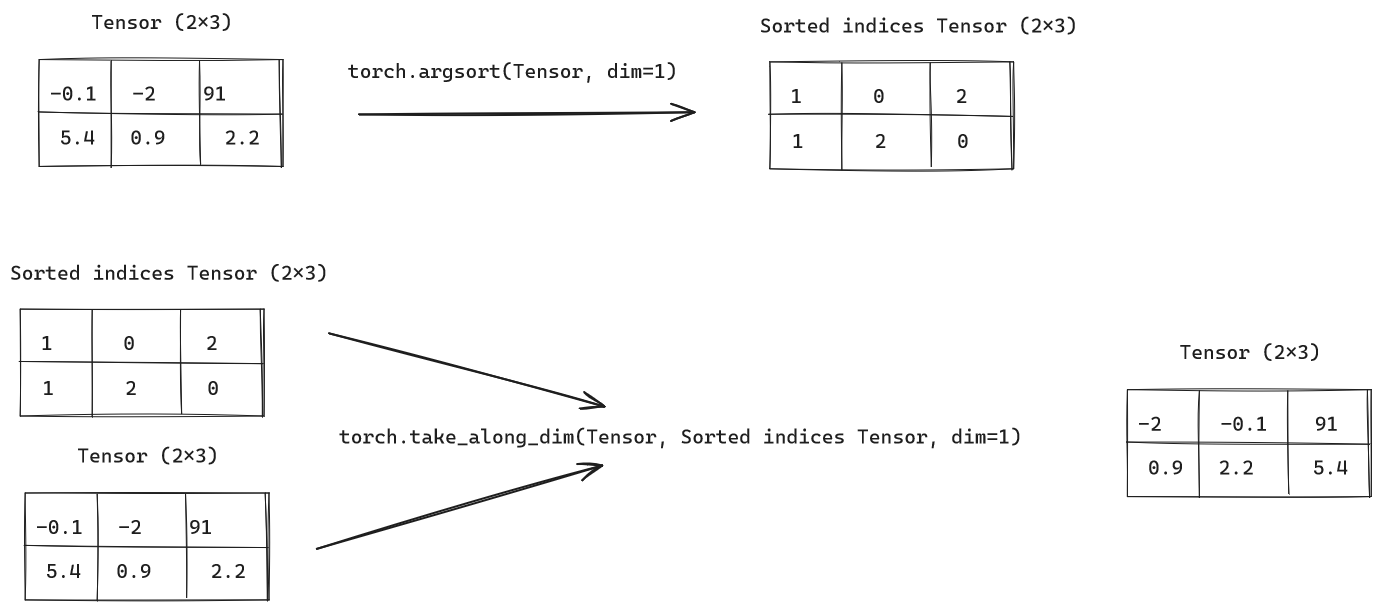

In [156]:
t = torch.tensor([[10, 20, 20], [60, 40, 50]])
max_idx = torch.argmax(t)
max_idx

tensor(3)

In [159]:
torch.take_along_dim(t, max_idx)

tensor([60])

In [162]:
sorted_idx = torch.argsort(t, dim=1)
torch.take_along_dim(t, sorted_idx, dim=1)

tensor([[10, 20, 20],
        [40, 50, 60]])

<a id="torch.tensor_split"></a>

### 30. **torch.tensor_split** IMPORTANT

`torch.tensor_split(input, indices_or_sections, dim=0) -> List of Tensors`

Splits a tensor into multiple sub-tensors, all of which are views of `input`, along dimension `dim` according to the indices or number of sections specified by `indices_or_sections`. 

In [164]:
x = torch.arange(8)
torch.tensor_split(x, 3)

(tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7]))

In [165]:
x = torch.arange(7)
torch.tensor_split(x, 3)

(tensor([0, 1, 2]), tensor([3, 4]), tensor([5, 6]))

If indices_or_sections is a list or tuple of ints, or a one-dimensional long tensor, then input is split along dimension dim at each of the indices in the list, tuple or tensor. For instance, `indices_or_sections=[2, 3]` and `dim=0` would result in the tensors `input[:2]`, `input[2:3]`, and `input[3:]`.

In [168]:
torch.tensor_split(x, (1,6))

(tensor([0]), tensor([1, 2, 3, 4, 5]), tensor([6]))

In [169]:
x = torch.arange(14).reshape(2, 7)
x

tensor([[ 0,  1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12, 13]])

In [170]:
torch.tensor_split(x, 3, dim=1)

(tensor([[0, 1, 2],
         [7, 8, 9]]),
 tensor([[ 3,  4],
         [10, 11]]),
 tensor([[ 5,  6],
         [12, 13]]))

In [171]:
torch.tensor_split(x, (1,6), dim=1)

(tensor([[0],
         [7]]),
 tensor([[ 1,  2,  3,  4,  5],
         [ 8,  9, 10, 11, 12]]),
 tensor([[ 6],
         [13]]))

<a id="torch.tile"></a>

### 31. torch.tile 

`torch.tile(input, dims) -> Tensor`

Constructs a tensor by repeacting the elements of `input`. The `dims` argument specifies the number of repetitions in each dimension.

If `dims` specifies fewer dimensions that `input` has, then one has prepended to `dims` until all dimensions are specified. For example, if `input` has shape (8, 6, 4, 2) and `dims` is (2, 2), then `dims` is treated as (1, 1, 2, 2). 

Analogously, if `input` has fewer dimensions than `dims` specifies, then `input` is treated as if it were unsqueezed at dimension zero until it has as many dimensions as `dims` specifies. For example,. if `input` has shape (4, 2) and dims is (3, 3, 2, 2), then `input` is treated as if it had the shape (1, 1, 4, 2).

In [172]:
x = torch.tensor([1, 2, 3])
x.tile((2,))

tensor([1, 2, 3, 1, 2, 3])

`torch.tile(y, (2,2))` tranlates to repeat the tensor twice of dim 0 and repeat tensor twice on dim 1.

In [177]:
y = torch.tensor([[1,2], [3, 4]])
print(f"shape of y: {y.shape}")
y = torch.tile(y, (2, 2))
print(f"torch.tile(y, (2, 2)): \n{y}")
print(f"shape of y: {y.shape}")

shape of y: torch.Size([2, 2])
torch.tile(y, (2, 2)): 
tensor([[1, 2, 1, 2],
        [3, 4, 3, 4],
        [1, 2, 1, 2],
        [3, 4, 3, 4]])
shape of y: torch.Size([4, 4])


<a id="torch.transpose"></a>

### 32. **torch.transpose** IMPORTANT

`torch.transpose(input, dim0, dim1) -> Tensor`

Return a tensor that is transposed version of `input`. The given dimensions `dim0` and `dim1` are swapped.

In [178]:
x = torch.randn(2,3)
x

tensor([[-0.4747, -1.4000,  0.9944],
        [-0.2844,  0.9088, -0.5140]])

In [179]:
torch.transpose(x, 0, 1)

tensor([[-0.4747, -0.2844],
        [-1.4000,  0.9088],
        [ 0.9944, -0.5140]])

<a id="torch.unbind"></a>

### 33. torch.unbind 

`torch.unbind(input, dim=0) -> seq`

Removes a tensor dimension.

Return a tuple of all slices along a given dimension, already without it.

In [180]:
torch.unbind(torch.tensor([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]]))

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

<a id="torch.unsqueeze"></a>
### 34. **torch.unsqueeze** VERY VERY IMPORTANT

Returns a new tensor with a dimension of size one inserted at the specified position.

The returned tensor shares the same underlying data with this tensor. 

a `dim` value within the range `[-input.dim() - 1, input.dim() + 1)` can be used. Negative `dim` will correspond to `unsqueeze()` applied at `dim = dim + input.dim() + 1`

In [184]:
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)

tensor([[1, 2, 3, 4]])

In [186]:
torch.unsqueeze(x, 0).shape

torch.Size([1, 4])

In [187]:
torch.unsqueeze(x, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [188]:
torch.unsqueeze(x, 1).shape

torch.Size([4, 1])

<a id="torch.vsplit"></a>

### 35. torch.vsplit 

`torch.vsplit(input, indices_or_selections) -> List of Tensors`

Splits `input`, a tensor with two or more dimensions, into multiple tensors vertically according to `indices_or_sections`. Each split is a view of `input`.

This is equivalent to calling `torch.tensor_split(input, indices_or_sections, dim=0)` (the split dimension is 0), except that if `indices_or_sections` is an integer it must evenly divide the split dimension or a runtime error will be thrown.

In [189]:
t = torch.arange(16.0).reshape(4, 4)
t

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [190]:
torch.vsplit(t, 2)

(tensor([[0., 1., 2., 3.],
         [4., 5., 6., 7.]]),
 tensor([[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]))

If indices_or_sections is a list or tuple of ints, or a one-dimensional long tensor, then input is split along dimension dim at each of the indices in the list, tuple or tensor. For instance, `indices_or_sections=[2, 3]` and `dim=0` would result in the tensors `input[:2]`, `input[2:3]`, and `input[3:]`.

In [192]:
torch.vsplit(t, [3, 6])

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[12., 13., 14., 15.]]),
 tensor([], size=(0, 4)))